In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import undetected_chromedriver as uc
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import highlight_text
import matplotlib.font_manager
from IPython.core.display import HTML 
import numpy as np 

In [2]:
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [3]:
chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--disable-gpu")
driver = uc.Chrome(headless=False,use_subprocess=False,option=chrome_options)
url=f"https://fbref.com/en/comps/31/passing/Liga-MX-Stats"
driver.get(url)
wait = WebDriverWait(driver, 10)  # waiting max 10sec, can be adjusted
table = wait.until(EC.visibility_of_element_located((By.ID, f"div_stats_passing")))
html_table = table.get_attribute('outerHTML')
info = pd.read_html(html_table)[0]

C:\Users\AlonsoCarmona\AppData\Local\Temp\ipykernel_30528\434288767.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  info = pd.read_html(html_table)[0]


In [4]:
info.columns=info.columns.droplevel(level=0)
info

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Matches
0,1,José Abella,mx MEX,DF,Santos,31-281,1994,14.9,503,715,...,5,2.7,2.5,+2.3,30,42,9,4,49,Matches
1,2,Carlos Acevedo,mx MEX,GK,Santos,29-213,1996,17.0,428,617,...,0,0.0,0.0,0.0,0,5,0,0,0,Matches
2,3,Alonso Aceves,mx MEX,DF,Pachuca,24-235,2001,14.3,657,805,...,2,1.3,0.8,+0.7,11,60,8,8,70,Matches
3,4,Sebastián Aceves,mx MEX,"DF,FW",Toluca,19-333,2005,1.5,58,68,...,0,0.0,0.1,0.0,0,6,1,1,3,Matches
4,5,Eduardo Águila,mx MEX,DF,Atlético,23-185,2002,14.9,542,633,...,0,0.1,0.1,-0.1,2,25,1,0,29,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,466,Mauro Zaleta,mx MEX,"DF,MF",Mazatlán,23-230,2002,6.1,171,236,...,0,0.0,0.2,0.0,1,4,3,3,6,Matches
484,467,Ángel Zapata,mx MEX,MF,Querétaro,24-288,2001,13.9,413,482,...,1,0.5,0.3,+0.5,6,44,4,0,55,Matches
485,468,Alejandro Zendejas,us USA,"FW,MF",América,27-284,1998,11.1,455,577,...,3,3.0,5.1,0.0,22,51,19,4,63,Matches
486,469,José Zúñiga,co COL,FW,América,31-128,1994,6.2,59,77,...,1,0.3,0.1,+0.7,3,3,2,0,2,Matches


In [5]:
info = info.loc[(info['Rk']!='Rk')]
info.head(27)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP,Matches
0,1,José Abella,mx MEX,DF,Santos,31-281,1994,14.9,503,715,...,5,2.7,2.5,+2.3,30,42,9,4,49,Matches
1,2,Carlos Acevedo,mx MEX,GK,Santos,29-213,1996,17.0,428,617,...,0,0.0,0.0,0.0,0,5,0,0,0,Matches
2,3,Alonso Aceves,mx MEX,DF,Pachuca,24-235,2001,14.3,657,805,...,2,1.3,0.8,+0.7,11,60,8,8,70,Matches
3,4,Sebastián Aceves,mx MEX,"DF,FW",Toluca,19-333,2005,1.5,58,68,...,0,0.0,0.1,0.0,0,6,1,1,3,Matches
4,5,Eduardo Águila,mx MEX,DF,Atlético,23-185,2002,14.9,542,633,...,0,0.1,0.1,-0.1,2,25,1,0,29,Matches
5,6,Daniel Aguirre,us USA,DF,Guadalajara,26-139,1999,6.2,323,382,...,1,1.2,0.9,-0.2,9,30,6,3,37,Matches
6,7,Eduardo Aguirre,mx MEX,"MF,FW",Atlas,27-107,1998,5.3,83,114,...,1,0.9,0.7,+0.1,5,10,7,1,15,Matches
7,8,Érick Aguirre,mx MEX,"DF,MF",Monterrey,28-268,1997,5.0,237,307,...,1,0.2,0.3,+0.8,5,12,6,5,21,Matches
8,9,Gaddi Aguirre,mx MEX,DF,Atlas,29-232,1996,16.0,536,654,...,0,0.0,0.1,0.0,0,21,2,0,25,Matches
9,10,Rodrigo Aguirre,uy URU,FW,América,31-048,1994,9.7,97,161,...,0,0.5,0.5,-0.5,4,7,3,0,16,Matches


In [6]:
df = info[['Player','Pos','Squad','90s','PrgP']]
df

,Player,Pos,Squad,90s,PrgP
0,José Abella,DF,Santos,14.9,49
1,Carlos Acevedo,GK,Santos,17.0,0
2,Alonso Aceves,DF,Pachuca,14.3,70
3,Sebastián Aceves,"DF,FW",Toluca,1.5,3
4,Eduardo Águila,DF,Atlético,14.9,29
...,...,...,...,...,...
483,Mauro Zaleta,"DF,MF",Mazatlán,6.1,6
484,Ángel Zapata,MF,Querétaro,13.9,55
485,Alejandro Zendejas,"FW,MF",América,11.1,63
486,José Zúñiga,FW,América,6.2,2


In [7]:
df['per90']=df['PrgP'].astype(float)/df['90s'].astype(float)
df

C:\Users\AlonsoCarmona\AppData\Local\Temp\ipykernel_30528\2502598581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['per90']=df['PrgP'].astype(float)/df['90s'].astype(float)


,Player,Pos,Squad,90s,PrgP,per90
0,José Abella,DF,Santos,14.9,49,3.288591
1,Carlos Acevedo,GK,Santos,17.0,0,0.000000
2,Alonso Aceves,DF,Pachuca,14.3,70,4.895105
3,Sebastián Aceves,"DF,FW",Toluca,1.5,3,2.000000
4,Eduardo Águila,DF,Atlético,14.9,29,1.946309
...,...,...,...,...,...,...
483,Mauro Zaleta,"DF,MF",Mazatlán,6.1,6,0.983607
484,Ángel Zapata,MF,Querétaro,13.9,55,3.956835
485,Alejandro Zendejas,"FW,MF",América,11.1,63,5.675676
486,José Zúñiga,FW,América,6.2,2,0.322581


In [8]:
df=df[df['90s'].astype(float)>6.5].reset_index()
df

,index,Player,Pos,Squad,90s,PrgP,per90
0,0,José Abella,DF,Santos,14.9,49,3.288591
1,1,Carlos Acevedo,GK,Santos,17.0,0,0.000000
2,2,Alonso Aceves,DF,Pachuca,14.3,70,4.895105
3,4,Eduardo Águila,DF,Atlético,14.9,29,1.946309
4,8,Gaddi Aguirre,DF,Atlas,16.0,25,1.562500
...,...,...,...,...,...,...,...
236,478,Pedro Vite,"MF,FW",UNAM,10.1,80,7.920792
237,481,Édgar Yoel Bárcenas,"MF,FW",Mazatlán,9.5,36,3.789474
238,484,Ángel Zapata,MF,Querétaro,13.9,55,3.956835
239,485,Alejandro Zendejas,"FW,MF",América,11.1,63,5.675676


In [9]:
df.describe()

,index,per90
count,241.000000,241.000000
mean,235.626556,3.382392
std,142.021483,2.214261
min,0.000000,0.000000
25%,111.000000,1.747573
50%,236.000000,3.200000
75%,357.000000,4.736842
max,487.000000,12.243590


In [10]:
df = df.sort_values(by='per90',ascending=False)
df =df[df['Pos']!='GK']
df.head(10)

,index,Player,Pos,Squad,90s,PrgP,per90
176,349,Agustín Palavecino,"MF,FW",Necaxa,15.6,191,12.243590
85,162,Álvaro Fidalgo,MF,América,12.1,145,11.983471
202,405,James Rodríguez,"FW,MF",León,10.9,114,10.458716
201,404,Charly Rodríguez,MF,Cruz Azul,13.0,132,10.153846
227,458,Óliver Torres,MF,Monterrey,13.4,129,9.626866
185,367,Gonzalo Piovi,DF,Cruz Azul,12.0,99,8.250000
215,425,Allan Saint-Maximin,"FW,MF",América,7.4,60,8.108108
213,422,Marcel Ruiz,MF,Toluca,12.6,101,8.015873
236,478,Pedro Vite,"MF,FW",UNAM,10.1,80,7.920792
151,298,Alejandro Mayorga,DF,FC Juárez,16.0,124,7.750000


In [12]:
df.head(20)

,index,Player,Pos,Squad,90s,PrgP,per90
176,349,Agustín Palavecino,"MF,FW",Necaxa,15.6,191,12.243590
85,162,Álvaro Fidalgo,MF,América,12.1,145,11.983471
202,405,James Rodríguez,"FW,MF",León,10.9,114,10.458716
201,404,Charly Rodríguez,MF,Cruz Azul,13.0,132,10.153846
227,458,Óliver Torres,MF,Monterrey,13.4,129,9.626866
185,367,Gonzalo Piovi,DF,Cruz Azul,12.0,99,8.250000
215,425,Allan Saint-Maximin,"FW,MF",América,7.4,60,8.108108
213,422,Marcel Ruiz,MF,Toluca,12.6,101,8.015873
236,478,Pedro Vite,"MF,FW",UNAM,10.1,80,7.920792
151,298,Alejandro Mayorga,DF,FC Juárez,16.0,124,7.750000


Text(0.5, 25.722222222222214, 'Pases progresivos por 90 minutos')

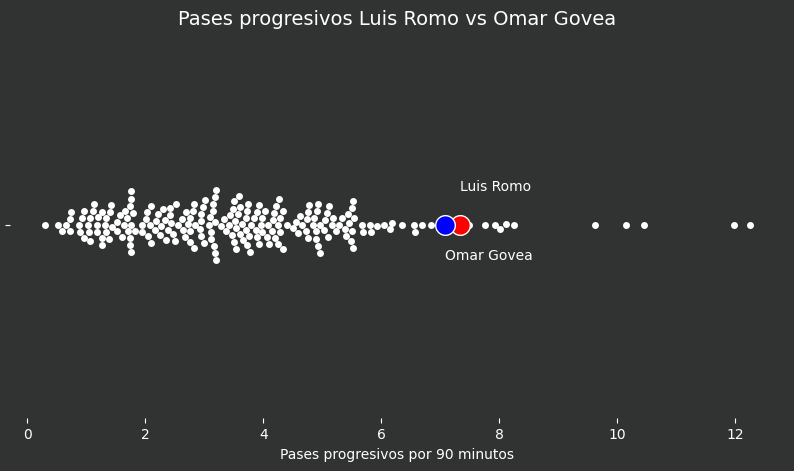

In [27]:
text_color = 'white'
background= '#313332'
fig,ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color

ax.grid(ls='dotted', lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x='per90',data=df,color='white',zorder=1)

plt.scatter(x=7.34,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s="Luis Romo", x= 7.34, y=-.002 ,c=text_color)

plt.scatter(x=7.08,y=0,c='blue',edgecolor='white',s=200,zorder=2)
plt.text(s="Omar Govea", x= 7.08, y=.002 ,c=text_color)

plt.title('Pases progresivos Luis Romo vs Omar Govea', c=text_color, fontsize=14)
plt.xlabel('Pases progresivos por 90 minutos',c=text_color)

